# Classifier Comparison Graph
I implemented this to make it easier to see what classifiers might be more helpful for a specific line. The method is still pretty imperfect and not very open, however for now it works, so I am fine with it.

First we have to do the imports. Here are all of the non-classifier imports we will need:

In [1]:
from MachineLearningModule import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp

..and here are all of the classifiers we will be testing. There are a lot.

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC

Now, we have to make our TableDictionarySystem:

In [3]:
table = pd.read_csv("Combined_Two_Port_Check_Standard.csv")
table_dictionary_system = split_table_by_columns(table, "Device_Id", "System_Id","Measurement_Date")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


After this, we do all of the normal edits to table_dictionary_system to clean it up and make it's data more valid for putting into a classifier. I used the multiple_edits method here, if you do not know how to use that method, check [Here.](Multiple_Edits Showoff Notebook.ipynb)

In [4]:
table_dictionary_system.multiple_edits(remove_column_duplicates={"column":"Frequency"},
                                       remove_short_tables={"row_count":10},
                                       keep_only_certain_columns={"columns":("Frequency","magS11","magS21","magS22")})

Now, we make an array dictionary system and interpolate our data, as well as generate fake data. 

In [5]:
array_dictionary_system = table_dictionary_system.convert_to_array_dictionary_system()

In [6]:
array_dictionary_system.interpolate_data(50,"Frequency",("magS11","magS21","magS22"))

In [7]:
fake_data_system = array_dictionary_system.make_fake_data_system_noise("Frequency",
                                                                       ["magS11"],
                                                                       15000,
                                                                       ("CTN210", "System 2,7"),
                                                                       [0.0005])

Now we generate the array of datasets for the magS11 variable, and check with a print statement to see if everything is going well.

In [8]:
magS11_arr = fake_data_system.get_dataset_variable_values("magS11")

In [9]:
print magS11_arr

[[ 0.03053408  0.03405031  0.03477195 ...,  0.08267483  0.06259387
   0.04679339]
 [ 0.03112427  0.03369891  0.03514742 ...,  0.0830741   0.06181466
   0.04682062]
 [ 0.03192477  0.03139082  0.03344388 ...,  0.07644303  0.05253921
   0.04692667]
 ..., 
 [ 0.03085098  0.03432654  0.03490664 ...,  0.0829393   0.06141285
   0.04506392]
 [ 0.02895492  0.03293572  0.03430426 ...,  0.08289658  0.06020508
   0.04293143]
 [ 0.02856761  0.03283558  0.03499582 ...,  0.07446035  0.04813115
   0.03993058]]


Now we will actually compare the classifiers using the get_classifier_comparison_results method. This method actually compares classifiers, and outputs a list that will be graphed by the graph_comparison_results soon. The arguments for the get_classifier_comparison_results method are as follows:

good_datasets: an array of good dataset values for a single variable. In this case we are using magS11_arr.

randomness_amplitude_range: an array of random noise amplitudes to be used to create "bad" data to train and test a classifier.

progress_printing: An optional argument detailling whether or not to print out progress on how far the method is in its completion. By default it is False.

classifiers: Keyword Arguments containing classifiers to be tested and compared. The keys they are assigned to should be the names of the classifiers.

In [10]:
classifier_dict = {"QDA": QuadraticDiscriminantAnalysis,
                   "Gaussian Naive Bayes": GaussianNB,
                   "Bernoulli Naive Bayes": BernoulliNB,
                   "Multinomial Naive Bayes": MultinomialNB,
                   "Decision Tree": DecisionTreeClassifier,
                   "Random Forest": RandomForestClassifier,
                   "Ridge": RidgeClassifier,
                   "SGD": SGDClassifier,
                   "Passive Aggressive": PassiveAggressiveClassifier,
                   "Perceptron": Perceptron,
                   "SVC": SVC}
classifier_results = get_classifier_comparision_results(magS11_arr,
                                                        np.linspace(0,0.005,50),
                                                        classifier_dict,
                                                        progress_printing=True)

Graphing Progress: ##################################################


Before we actually show the graph, we should set some settings to make the graph look good:
the tick sizes on the axes, as well as the font size of all the other text:

In [29]:
mp.rcParams.update({'font.size': 36})
mp.rc('xtick', labelsize=36) 
mp.rc('ytick', labelsize=36) 

Now, we finally do the graph_comparison_results method. 

The major reason this method is seperate from the get_classifier_comparison_results method is so that parameters in this method can be tweaked in an IPython notebook or something similar without having to go through the large execution times of the get_classifier_comparison_results method. 

To do the graph_comparison_results method, the results of the get_classifier_comparison_results method must be inputted as the first argument, and then keyword arguments containing arguments to go to plot calls may also optionally be inputted. Optionally, a plot_axis argument can be put in as well, where an axis variable from something like plt.subplots can be inputted, except we will not be using that here.

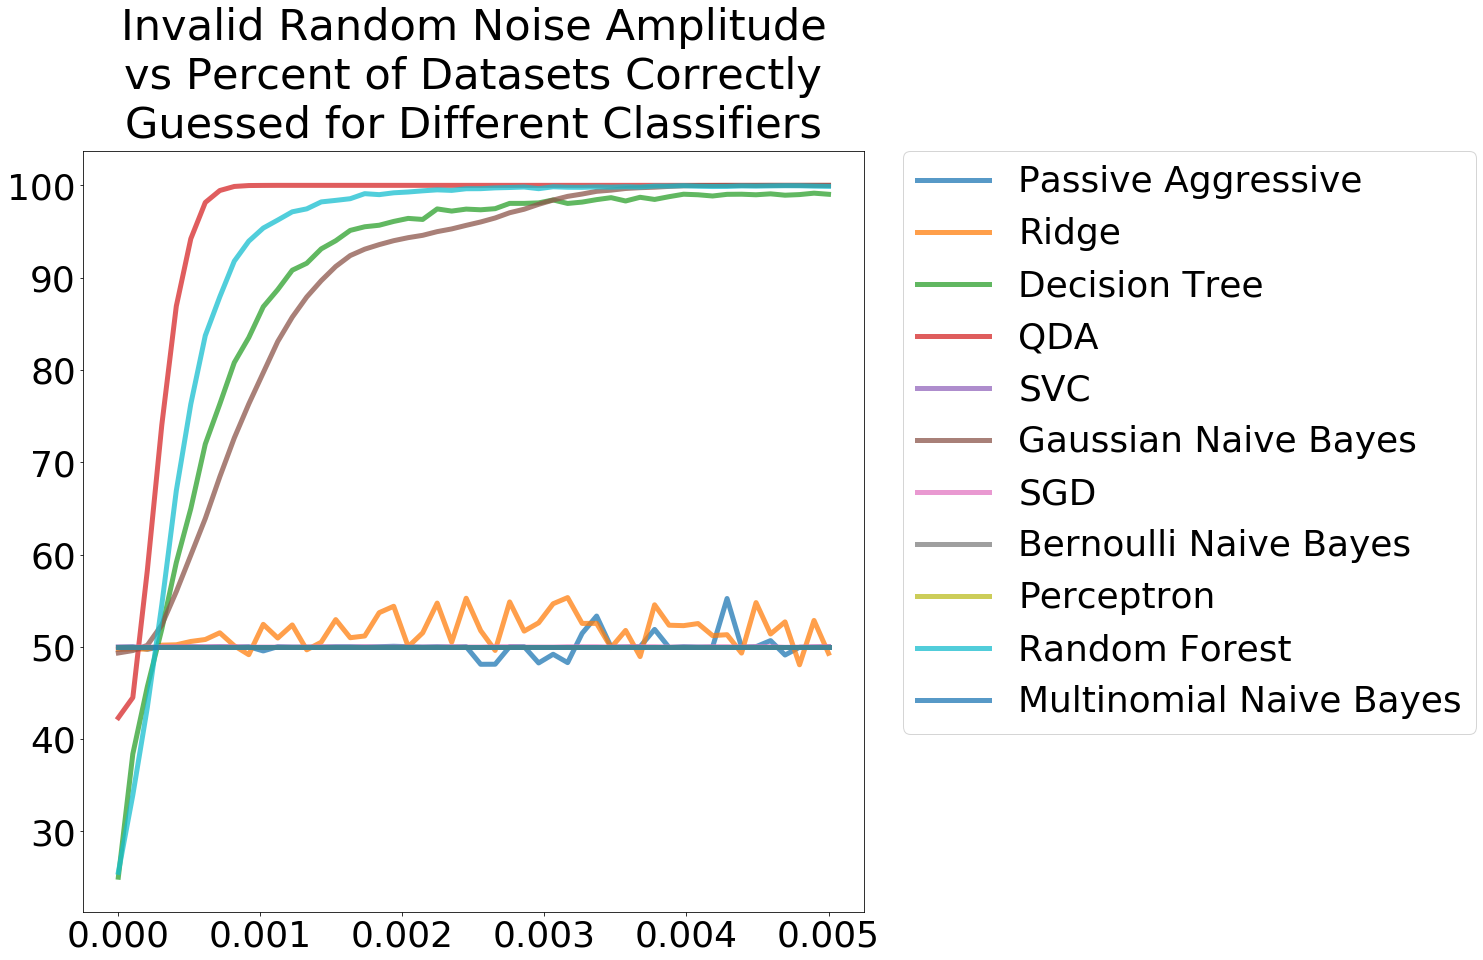

In [30]:
plt.figure(figsize=(14,14))
graph_comparison_results(classifier_results,lw=5,alpha=0.75)
plt.title("Invalid Random Noise Amplitude\nvs Percent of Datasets Correctly\nGuessed for Different Classifiers",y=1.01)
plt.show()